# Classification and Similarity Metrics.
# Cross Validation.
# Titanic Dataset.
-----------------------------
Radoslav Petkov

### About me
--------------
* Contact: https://www.linkedin.com/in/radoslav-petkov-8a4a53144/

# Agenda
* Recap
    * Supervised vs Unsupervised
    * Classification vs Regression
* Similarity Metrics
    * Euclidian distance
    * Manhattan distance
    * Cosine similarity
* Classification Metrics
    * Accuracy
    * Confusion Matrix
        * Precision
        * Recall
        * F1
* Cross Validation
* Titanic

# Recap

### Supervised vs Unsupervised
### Classification vs Regression

# Similarity Metrics

Def: Real valued function that measures the similarity between 2 objects (vectors).

## Euclidian distance

Def : Ordinary straight line distance: $ \sqrt{\sum_{i=1}^n (x_i-y_i)^2} $

![](euclidean.png)



## Manhattan distance

Def: Simple sum of the horizontal and vertical components $ \sum_{i=1}^n |x_i-y_i| $

![](manhattan.png)

## Cosine similarity
Def: Measure of similarity between 2 non-zero vectors of a nordmed space that measures the cosine of the angle between them. $ cos(\pmb x, \pmb y) = \frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||} $

![](cosine.png)

# Summarized
![](cover_post_final.png)

# Cross Validation

### We overfit. We do not have enought data. What we do?

# K-Fold Cross Validation


Split the dataset in K subsets and use K-1 for training and K for testing. The error rate is avaraged over all K trials.
![](K-fold_cross_validation_EN.jpg)

# Classification metrics

How to measure the performance of a model?

## Accuracy
The number of correct predictions from all predictions made.
![](accuracy.jpg)

Problem statement: 

Imagine having labels (False and True) distributed like this: 
***90% False and 10% True***

The model that constantly output ***False*** will have ***90%*** accuracy. Not bad. 

# The solution: Confusion matrix

Table that allows visualization of the performance of a supervised algorithm

![](sphx_glr_plot_confusion_matrix_002.png)

# Binary Confusion Matrix
![](confusion_matrix_1.png)

## Precision
Precision is: $ \frac{TP}{TP + FP} \ $

True Positives divided by the sum of True Positives and False Positives

![](confusion_matrix_1.png)

## Recall

Recall is: $ \frac{TP}{TP + FN} \ $

True Positives divided by the sum of True Positives and False Negatives.
![](confusion_matrix_1.png)

# F1 score

F1 score is the harmonic mean of Recall and Precision: $\frac{2*Recall*Precision}{Recall + Precission} $

# Titanic: Machine Learning from Disaster

![](hqdefault.jpg)

In [6]:
import pandas as pd

test = pd.read_csv('https://raw.githubusercontent.com/radpet/fmi-ml/master/titanic/test.csv', index_col='PassengerId')
train = pd.read_csv('https://raw.githubusercontent.com/radpet/fmi-ml/master/titanic/train.csv', index_col='PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


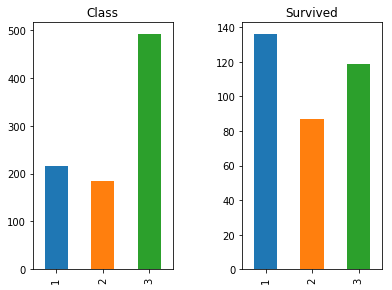

In [98]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3, 1)
train['Pclass'].value_counts(sort=False).plot(kind="bar", title="Class")
fig.add_subplot(2, 3, 2)
train[ train['Survived'] == 1]['Pclass'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survived')

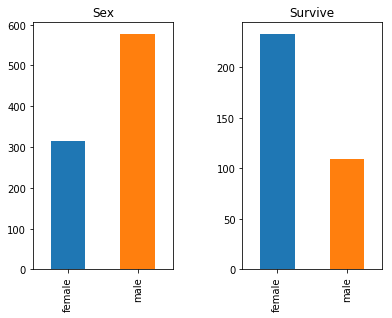

In [97]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3,1)
train['Sex'].value_counts(sort=False).sort_index().plot(kind="bar", title="Sex")
fig.add_subplot(2, 3,2)
train[ train['Survived'] == 1]['Sex'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survive')

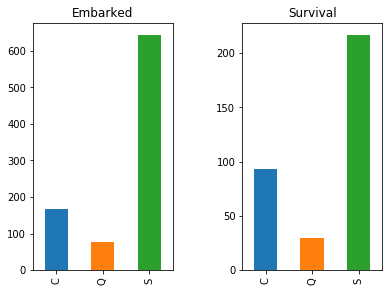

In [95]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(wspace=0.5)
fig.add_subplot(2, 3, 1)
train['Embarked'].value_counts(sort=False).sort_index().plot(kind="bar", title="Embarked")
fig.add_subplot(2, 3, 2)
train[ train['Survived'] == 1]['Embarked'].value_counts(sort=False).sort_index().plot(kind='bar', title='Survival')

In [100]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### We have missing data! What can we do now?

* Remove whole sample
* Fill with mean
* Fill with data augmentation
* Create model that predicts the missing values

# Lets explore the data more and find if we can find a way to fill Age,Cabin,Embarked

Lets look what the names might tell us. A quick search in wikipedia (https://en.wikipedia.org/wiki/English_honorifics) gives:

* Master: for boys or young men and as a title for the heir apparent of a Scottish baron or viscount.
* Mr: for men, regardless of marital status, who do not have another professional or academic title
* Miss: for girls, unmarried women and (in the UK) married women who continue to use their maiden name (although "Ms" is often preferred for the last two). 
* Ms: for women, regardless of marital status or when marital status is unknown.

In [123]:
train[ train['Age']<12].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [122]:
train[ train['Age']>12].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# References
* http://fmi.machine-learning.bg/lectures/07-model-validation
* http://scikit-learn.org/stable/modules/model_evaluation.html
* https://turi.com/learn/userguide/evaluation/classification.html
* http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* https://www.kaggle.com/c/titanic